### ML models for Sales Time Series Forecasting review

- 이 논문의 목표: Consider main approaches and case studies of using machine learning for sales forecasting 

- considered machine learning generalization
    - 새로운 모델에 대한 런칭을 앞두고 있어 특정 기간의 과거 판매 데이터의 양이 적은 경우 판매 예측할 때 활용<bh><bh>
- Using stacking approach 
    - 시계열 예측 모델의 성능이 향상됨  
- Considered lagged variable selection, hyperparameter optimization, comparison between classical algorithms and ML based algorighms for time series

### data feature 

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
# data source 

# Rossmann Store Sales Forecast sales using store, promotion, and competitor data
# https://www.kaggle.com/competitions/rossmann-store-sales/data 

# 데이터 특성상 타깃 변수(목표 변수값, sales)에 대한 과거 데이터 양이 적음     
import pandas as pd 

sales_df = pd.read_csv('./train.csv')
sales_df.head(5)

C:\Users\KANGJIHUN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_df.shape

(1017209, 9)

In [9]:
sales_df['Date'].value_counts(ascending=False)

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

### ML predictive Models 

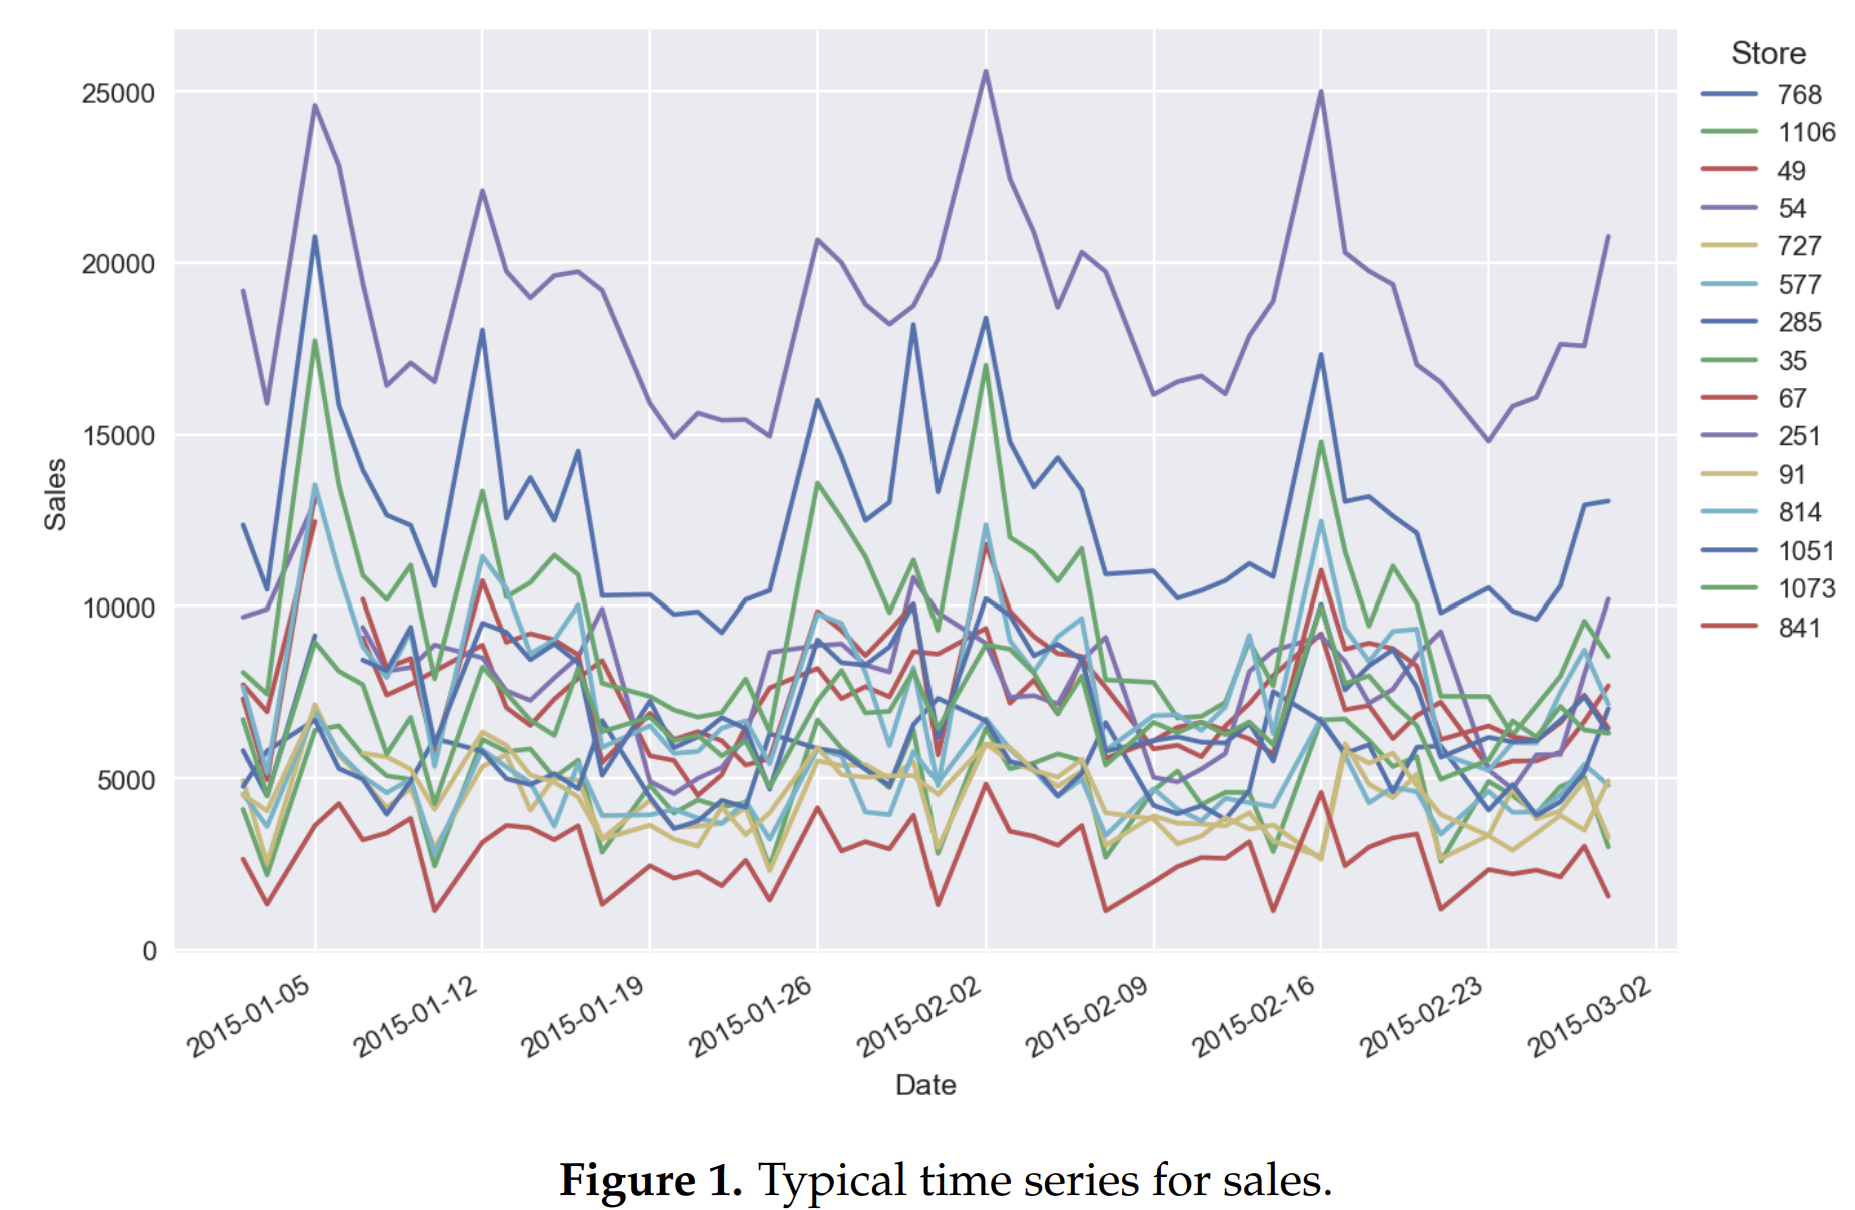

In [ ]:
# feature importance

In [ ]:
# rolling mean 

### Stacking method 

1. 스태킹 앙상블 
- 스태킹은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅 및 부스팅과 공통점이 있다. 하지만 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점이다. 즉, 개별 알고리즘의 예측 결과 데이터 셋을 최종적인 메타 데이터 셋으로 만든 후 별도의 ML 알고리즘으로 최종 학습 및 예측을 진행하는 방식이다. 이런식으로 개별 모델의 예측 데이터를 기반으로 학습하고 예측하는 방식을 메타 모델이라고 한다.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

### 1. 기본 스태킹 모델
#### 1.1개별 모델 학습/예측/평가

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 위스콘신 유방암 데이터
cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [13]:
X_data.shape

(569, 30)

In [15]:
y_label.shape

(569,)

- KNN, 랜덤 포레스트, 결정 트리, 에이다부스트를 개별 모델로 설정하고 최종 모델은 로지스틱으로 설정하였다.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# 개별 ML 모델
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier(random_state=0)
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 모델
lr_final = LogisticRegression(C=10)

# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [8]:
from sklearn.metrics import accuracy_score

# 개별 모델 예측 데이터 셋 및 정확도
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
rf_acc = accuracy_score(y_test, rf_pred)
dt_acc = accuracy_score(y_test, dt_pred)
ada_acc = accuracy_score(y_test, ada_pred)

print(f'KNN 정확도: {knn_acc:.4f}')
print(f'랜덤 포레스트 정확도: {rf_acc:.4f}')
print(f'결정 트리 정확도: {dt_acc:.4f}')
print(f'에이다부스트 정확도: {ada_acc:.4f}')

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


- 개별 모델로 test set 예측 결과를 저장하고 성능 평가를 진행하였다.

### 1.2 메타 데이터

In [11]:
# 개별 예측 결과를 stacking
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# 개별 모델의 예측 결과를 피처로 생성
pred = pred.T
print(pred.shape)

(4, 114)
(114, 4)


- 개별 모델의 예측 결과를 결합하고 전치하여 메타 데이터를 생성한다.

### 1.3 최종 학습/예측/평가

In [10]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
lr_final_acc = accuracy_score(y_test , final)

print(f'최종 메타 모델의 예측 정확도: {lr_final_acc:.4f}')

최종 메타 모델의 예측 정확도: 0.9737


앞서 작업은 개별 모델로 test set의 예측 결과를 결합해 메타 데이터를 생성

메타 데이터와 test set으로 최종 모델 학습, 최종 모델을 이용해 메타 데이터의 예측/평가를 진행하였다.

이러한 방법은 다음과 같은 문제가 있다.

- 최종 학습에 test set을 사용했기에 과적합 문제가 발생할 수 있다.

- 또한 최종 학습에 메타 데이터를 사용하고 메타 데이터에 대한 예측을 진행하였다.

CV 스태킹은 이를 개선한 방법으로 다음 예시로 이해해보자.

- 개별 모델이 4개이고, 데이터는 100개로 train 60개, test 40개, fold는 3이라 가정

- 첫 번째 모델에서 train 60개에 대해 학습시 train_fold 40개, test_fold 20개로 예측을 진행할 것이다.

- 각 fold별로 예측값은 20개씩 3번 구해지고 train 갯수와 같은 총 60개의 예측값을 얻을 수 있을 것이다. 이를 train 메타 데이터로 사용한다.

- 각 fold별로 test_fold가 아닌 test에 대해 예측을 진행한다. 즉, train_fold 40개로 test 40개를 예측한다.

- 3번 반복하면 40개씩 3묶음의 예측 데이터가 생성될 것이다. 이를 평균내어 40개의 test 메타 데이터로 사용한다.

- 개별 모델이 4개이므로 train 메타 데이터는 60 x 4, test 메타 데이터는 40 x 4로 생성 된다.

- train 메타 데이터를 피처로, y_train을 레이블로 학습 후, test 메타 데이터에 대해 예측하고 y_test와 비교로 평가한다.

### 2.1 CV 스태킹 함수

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# 개별 모델별 메타 데이터
def get_stacking_base_datasets(model, X_train, y_train, X_test, n_folds):
    # KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    
    # 메타 데이터 반환을 위한 기본 배열
    train_cnt = X_train.shape[0]
    test_cnt = X_test.shape[0]
    train_meta = np.zeros((train_cnt, 1))
    test_meta = np.zeros((test_cnt, n_folds))
    
    print(model.__class__.__name__ , ' model 시작 ')
    
    # train 데이터를 기반으로 fold를 나눠 학습/예측
    for i , (train_fold_idx, test_fold_index) in enumerate(kf.split(X_train)):
        # train, test fold 생성
        print(f'\t 폴드 세트: {i+1} 시작 ')
        x_train_fold = X_train[train_fold_idx] 
        y_train_fold = y_train[train_fold_idx] 
        x_test_fold = X_train[test_fold_index]  
        
        # train_fold로 학습
        model.fit(x_train_fold , y_train_fold)       
        
        # train 메타 데이터 생성 (x_test_fold 예측)
        train_meta[test_fold_index, :] = model.predict(x_test_fold).reshape(-1,1)
        
        # test 메타 데이터 생성 (x_test 예측) - 평균 전
        test_meta[:, i] = model.predict(X_test)
            
    # test 메타 데이터 생성 - 평균 진행
    test_meta_mean = np.mean(test_meta, axis=1).reshape(-1,1)    
    
    # train test 메타 데이터 반환
    return train_meta , test_meta_mean

In [13]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트: 1 시작 
	 폴드 세트: 2 시작 
	 폴드 세트: 3 시작 
	 폴드 세트: 4 시작 
	 폴드 세트: 5 시작 
	 폴드 세트: 6 시작 
	 폴드 세트: 7 시작 
RandomForestClassifier  model 시작 
	 폴드 세트: 1 시작 
	 폴드 세트: 2 시작 
	 폴드 세트: 3 시작 
	 폴드 세트: 4 시작 
	 폴드 세트: 5 시작 
	 폴드 세트: 6 시작 
	 폴드 세트: 7 시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트: 1 시작 
	 폴드 세트: 2 시작 
	 폴드 세트: 3 시작 
	 폴드 세트: 4 시작 
	 폴드 세트: 5 시작 
	 폴드 세트: 6 시작 
	 폴드 세트: 7 시작 
AdaBoostClassifier  model 시작 
	 폴드 세트: 1 시작 
	 폴드 세트: 2 시작 
	 폴드 세트: 3 시작 
	 폴드 세트: 4 시작 
	 폴드 세트: 5 시작 
	 폴드 세트: 6 시작 
	 폴드 세트: 7 시작 


- 각 모델별로 train, test 메타 데이터를 생성하였고 이를 합치기만 하면 최종 메타 데이터가 완성된다.

### 2.2 메타 데이터

In [14]:
final_X_train_meta = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
final_X_test_meta = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

print('원본 train 피처 데이터 Shape:',X_train.shape)
print('원본 test 피처 데이터 Shape:',X_test.shape)
print('최종 train 피처 메타 데이터 Shape:', final_X_train_meta.shape)
print('최종 test 피처 메타 데이터 Shape:',final_X_test_meta.shape)

원본 train 피처 데이터 Shape: (455, 30)
원본 test 피처 데이터 Shape: (114, 30)
최종 train 피처 메타 데이터 Shape: (455, 4)
최종 test 피처 메타 데이터 Shape: (114, 4)


- 최종 메타 데이터가 잘 생성되었고 한 가지, 메타 데이터의 열 갯수는 개별 모델 갯수임을 기억하자.

### 2.3 최종 학습/예측/평가

In [16]:
from sklearn.metrics import accuracy_score

lr_final.fit(final_X_train_meta, y_train)
final_pred = lr_final.predict(final_X_test_meta)
final_acc = accuracy_score(y_test, final_pred)
print(f'최종 메타 모델의 예측 정확도: {final_acc:.4f}')

최종 메타 모델의 예측 정확도: 0.9737
